In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

Load in dataset

In [2]:
tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root= './data', train=True, download=True, transform=tensor_transform)

loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)


In [8]:
# select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
class AE(torch.nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28),
            torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
model = AE().to(device)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

Epoch 1, Loss: 103.63518749922514
Epoch 2, Loss: 76.35077771544456
Epoch 3, Loss: 68.19749891385436
Epoch 4, Loss: 64.35654673911631
Epoch 5, Loss: 61.68919582851231
Epoch 6, Loss: 59.78516374900937
Epoch 7, Loss: 58.48139642551541
Epoch 8, Loss: 57.13080097734928
Epoch 9, Loss: 55.119345584884286
Epoch 10, Loss: 53.62560706213117
Epoch 11, Loss: 51.95258118584752
Epoch 12, Loss: 50.765498673543334
Epoch 13, Loss: 50.11268145777285
Epoch 14, Loss: 49.54130685515702
Epoch 15, Loss: 49.12240594625473
Epoch 16, Loss: 48.79366287402809
Epoch 17, Loss: 48.49367034249008
Epoch 18, Loss: 48.14492943324149
Epoch 19, Loss: 47.62872941792011
Epoch 20, Loss: 46.840747540816665
Epoch 21, Loss: 46.22987433895469
Epoch 22, Loss: 45.88544838130474
Epoch 23, Loss: 45.65244414843619
Epoch 24, Loss: 45.325244119390845
Epoch 25, Loss: 45.176750591024756
Epoch 26, Loss: 44.95174877345562
Epoch 27, Loss: 44.81050238199532
Epoch 28, Loss: 44.64071248099208
Epoch 29, Loss: 44.502650574781
Epoch 30, Loss: 44.

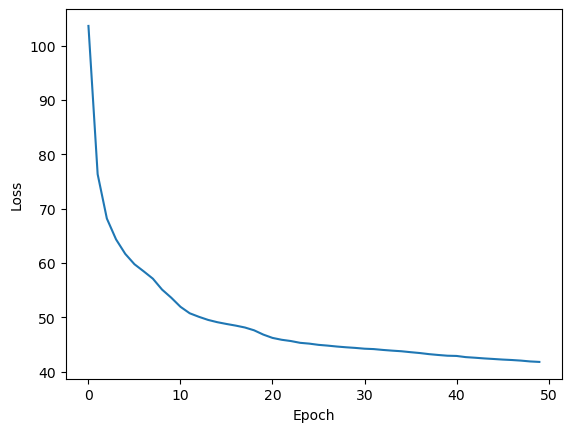

In [10]:
epochs = 50
outpus = []
losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for images, _ in loader:
        images = images.reshape(-1, 28*28).to(device)

        reconstructed = model(images)

        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(loader)}")

    outpus.append((epoch, images, reconstructed))

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


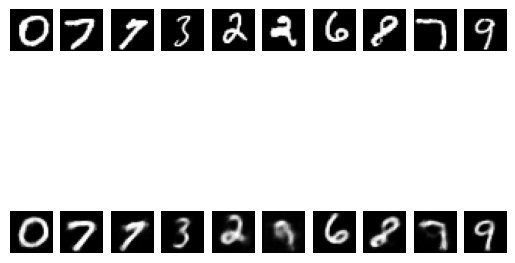

In [11]:
# show the last epoch
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(outpus[-1][1][i].reshape(28,28).cpu().detach().numpy(), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 10, i+11)
    plt.imshow(outpus[-1][2][i].reshape(28,28).cpu().detach().numpy(), cmap='gray')
    plt.axis('off')

In [13]:
# get the test data
test_dataset = datasets.MNIST(root= './data', train=False, download=True, transform=tensor_transform)
# shape 
print(test_dataset.data.shape)

torch.Size([10000, 28, 28])


Test Loss: 0.022185077486089624


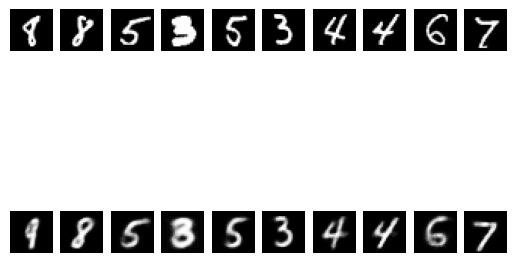

In [ ]:
# data loader for test data
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                     batch_size = 32,
                                     shuffle = True)

# test the model
test_loss = 0
test_output = []
model.eval()
with torch.no_grad():   
    for images, _ in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        reconstructed = model(images)
        loss = loss_function(reconstructed, images)
        test_loss += loss.item()

        test_output.append((images, reconstructed))

print(f"Test Loss: {test_loss/len(test_loader)}")

# show the test data
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_output[-1][0][i].reshape(28,28).cpu().detach().numpy(), cmap='gray') # original
    plt.axis('off')

    plt.subplot(2, 10, i+11)
    plt.imshow(test_output[-1][1][i].reshape(28,28).cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
